<a href="https://colab.research.google.com/github/alexfaia/MVP_ML/blob/main/MVP_PUC_RIO_ML_ALEX_FAIA_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning -
## Aluno: Alex Amorim Faia

### MVP de Conclusão de Sprint de Machine Learning


In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
# Manipulação de dados
import pandas as pd
import numpy as np
# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos de Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from typing import Optional
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/alexfaia/MVP_ML/main/german_credit.csv"
# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

dataset.info()
linhas = dataset.shape[0]
colunas = dataset.shape[1]

# Mostra as primeiras linhas do dataset

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
duplicados = dataset.duplicated()
duplicados = duplicados.sum()

print('A base de dados tem %s dados duplicados.' %(duplicados))

A base de dados tem 0 dados duplicados.


In [ ]:
nulos = dataset.isnull()
nulos.sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [ ]:
y = dataset['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [ ]:
x = dataset.drop(columns = 'default')
x.head(3)

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [ ]:

a = { 'no checking account' : 4,
      '>= 200 DM / salary assignments for at least 1 year' : 3,
      '0 <= ... < 200 DM' : 2,
      '< 0 DM' : 1
}
dataset['account_check_status'] = dataset['account_check_status'].map(a)


a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
}
dataset['credit_history'] = dataset['credit_history'].map(a)


a = { 'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
}
dataset['purpose'] = dataset['purpose'].map(a)


a = { 'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
}
dataset['savings'] = dataset['savings'].map(a)


a = { '.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
}
dataset['present_emp_since'] = dataset['present_emp_since'].map(a)



a = { 'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
}
dataset['personal_status_sex'] = dataset['personal_status_sex'].map(a)



a = { 'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
}
dataset['other_debtors'] = dataset['other_debtors'].map(a)

a = { 'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
}
dataset['property'] = dataset['property'].map(a)



a = { 'bank' : 1,
      'stores' : 2,
      'none' : 3
}
dataset['other_installment_plans'] = dataset['other_installment_plans'].map(a)

a = { 'rent' : 1,
      'own' : 2,
      'for free' : 3
}

dataset['housing'] = dataset['housing'].map(a)


a = { 'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
}
dataset['job'] = dataset['job'].map(a)


a = { 'yes, registered under the customers name ' : 1,
      'none' : 0
}
dataset['telephone'] = dataset['telephone'].map(a)


a = { 'yes' : 1,
      'no' : 0
}
dataset['foreign_worker'] = dataset['foreign_worker'].map(a)


dataset.head()


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,1


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
y = dataset['default']
x = dataset.drop(columns = 'default')

In [ ]:
from sklearn.model_selection import train_test_split
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))




A base de treino tem 700 elementos e a base de teste tem 300 elementos.


In [ ]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)
print(modelo.score(treino_x, treino_y))

0.7442857142857143


In [ ]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 3)*100
acuracia

80.7

In [ ]:
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues', values_format='.3g')
plt.show()  # Exibe a matriz de confusão


NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:16]
y = array[:,16]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação



In [ ]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# # Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# # Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

In [ ]:
print(X_train)


[[ 0  4  4 ... 23  3  1]
 [ 0  4 18 ... 24  3  1]
 [ 0  1 24 ... 29  3  3]
 ...
 [ 0  4 24 ... 38  3  2]
 [ 1  4  6 ... 32  3  2]
 [ 0  4  9 ... 32  3  2]]


In [ ]:
from sklearn.model_selection import train_test_split

SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

LR: 0.711250 (0.043821)
KNN: 0.570000 (0.041155)
CART: 0.665000 (0.049624)
NB: 0.711250 (0.055467)
SVM: 0.632500 (0.006124)
Bagging: 0.771250 (0.041098)
RF: 0.760000 (0.048670)
ET: 0.738750 (0.045225)
Ada: 0.482500 (0.095066)
GB: 0.765000 (0.028395)
Voting: 0.682500 (0.037997)


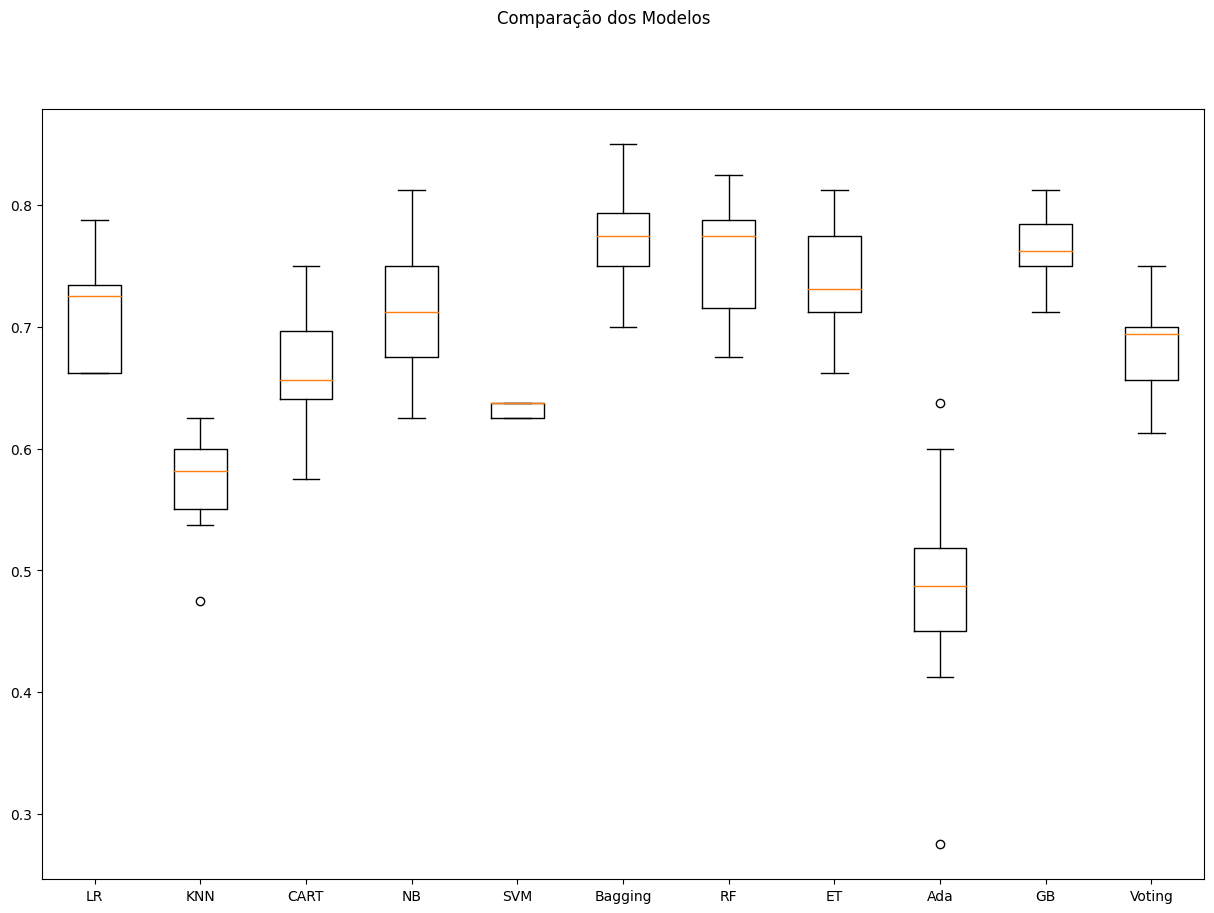

In [ ]:
# # # Listas para armazenar os resultados
results = []
names = []
# # # Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# # # Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.711 (0.044)
KNN-orig: 0.570 (0.041)
CART-orig: 0.665 (0.050)
NB-orig: 0.711 (0.055)
SVM-orig: 0.632 (0.006)
Bag-orig: 0.771 (0.041)
RF-orig: 0.760 (0.049)
ET-orig: 0.739 (0.045)
Ada-orig: 0.482 (0.095)
GB-orig: 0.765 (0.028)
Vot-orig: 0.683 (0.038)
LR-padr: 0.754 (0.057)
KNN-padr: 0.699 (0.041)
CART-padr: 0.662 (0.044)
NB-padr: 0.425 (0.117)
SVM-padr: 0.762 (0.054)
Bag-padr: 0.770 (0.045)
RF-padr: 0.773 (0.054)
ET-padr: 0.736 (0.036)
Ada-padr: 0.482 (0.095)
GB-padr: 0.755 (0.031)
Vot-padr: 0.762 (0.054)
LR-norm: 0.755 (0.057)
KNN-norm: 0.677 (0.029)
CART-norm: 0.666 (0.050)
NB-norm: 0.434 (0.118)
SVM-norm: 0.760 (0.048)
Bag-norm: 0.774 (0.043)
RF-norm: 0.773 (0.041)
ET-norm: 0.746 (0.044)
Ada-norm: 0.482 (0.095)
GB-norm: 0.756 (0.026)
Vot-norm: 0.760 (0.045)


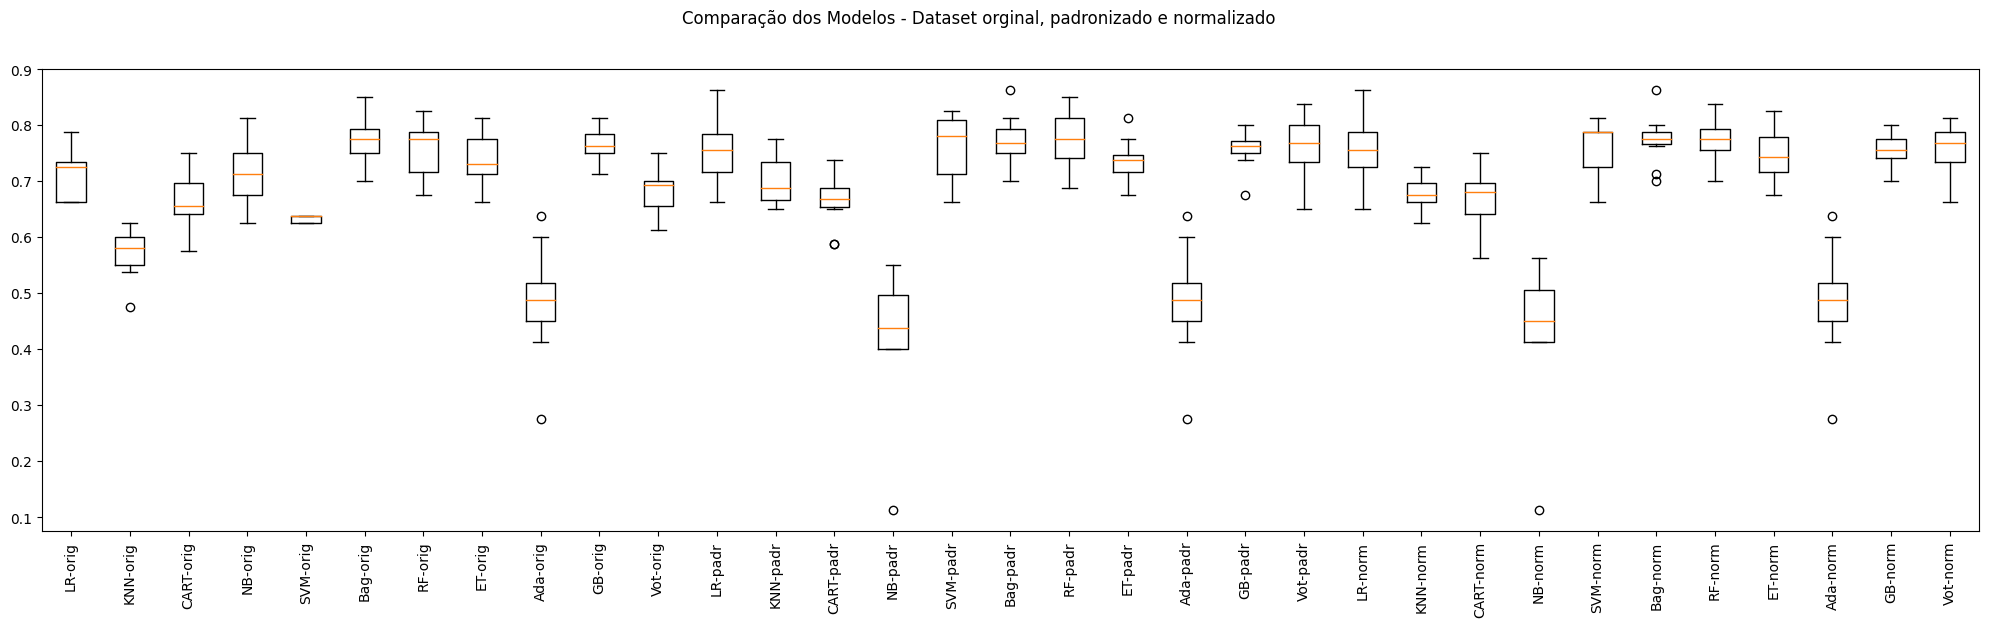

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.632500 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}
Sem tratamento de missings: knn-padr - Melhor: 0.731250 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 13}
Sem tratamento de missings: knn-norm - Melhor: 0.720000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.79


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# # Novos dados - não sabemos a classe!
# data = {'preg':  [1, 9, 5],
#         'plas': [90, 100, 110],
#         'pres': [50, 60, 50],
#         'skin': [30, 30, 30],
#         'test': [100, 100, 100],
#         'mass': [20.0, 30.0, 40.0],
#         'pedi': [1.0, 2.0, 1.0],
#         'age': [15, 40, 40],
#         }

# atributos = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
# entrada = pd.DataFrame(data, columns=atributos)

# array_entrada = entrada.values
# X_entrada = array_entrada[:,0:8].astype(float)

# # Padronização nos dados de entrada usando o scaler utilizado em X
# rescaledEntradaX = scaler.transform(X_entrada)
# print(rescaledEntradaX)

In [ ]:
# # Predição de classes dos dados de entrada
# saidas = model.predict(rescaledEntradaX)
# print(saidas)